<a href="https://colab.research.google.com/github/Ashutosh126/Hostinger-clone-website/blob/main/diabaticrethinopathy_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install efficientnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
from tkinter import filedialog
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import efficientnet.tfkeras as efn
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
import zipfile, os
local_zip = '/content/drive/MyDrive/datadr/diabaticR.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/diabaticR-extract')
zip_ref.close()

base_dir = '/content/diabaticR-extract/gaussian_filtered_images/gaussian_filtered_images/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen  = ImageDataGenerator(
                      rescale=1./255,
                      # rotation_range=20,
                      # horizontal_flip=True,
                      # vertical_flip=True,
                      zoom_range = 0.2,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      # brightness_range=(0.5, 1),
                      # shear_range = 0.2,
                      # fill_mode = 'constant',
                      validation_split=0.2)


train_data = datagen.flow_from_directory(base_dir,
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical',
                                         subset='training'
                                        )

valid_data = datagen.flow_from_directory(base_dir,
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical',
                                         subset='validation'
                                        )

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
def lr_rate(epoch, lr):
    if epoch < 10:
        lr = 0.0001
        return lr
    elif epoch <= 15:
        lr = 0.0005
        return lr
    elif epoch <= 30:
        lr = 0.0001
        return lr
    else:
        lr = lr * (epoch / (1 + epoch))
        return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [ ]:
# Load the EfficientNetB0 model with pre-trained weights from ImageNet
base_model = efn.EfficientNetB0(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)  # Additional dense layer for fine-tuning
predictions = tf.keras.layers.Dense(5, activation='softmax')(x)  # Output layer with 5 classes

# Create the hybrid model
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)









16804768/16804768 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit_generator(train_data,
                              validation_data=valid_data,
                              callbacks=[lr_callback],
                              epochs=25,
                              verbose=1)

<ipython-input-9-0d21a85a01dd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data,


Epoch 1/25
92/92 [==============================] - 969s 10s/step - loss: 0.8806 - acc: 0.6844 - val_loss: 0.8909 - val_acc: 0.6758 - lr: 1.0000e-04
Epoch 2/25
92/92 [==============================] - 911s 10s/step - loss: 0.6584 - acc: 0.7544 - val_loss: 0.7301 - val_acc: 0.7346 - lr: 1.0000e-04
Epoch 3/25
92/92 [==============================] - 906s 10s/step - loss: 0.5703 - acc: 0.7820 - val_loss: 0.6535 - val_acc: 0.7579 - lr: 1.0000e-04
Epoch 4/25
92/92 [==============================] - 886s 10s/step - loss: 0.5290 - acc: 0.8008 - val_loss: 0.6336 - val_acc: 0.7661 - lr: 1.0000e-04
Epoch 5/25
92/92 [==============================] - 873s 9s/step - loss: 0.4714 - acc: 0.8294 - val_loss: 0.5438 - val_acc: 0.8003 - lr: 1.0000e-04
Epoch 6/25
92/92 [==============================] - 879s 10s/step - loss: 0.4540 - acc: 0.8359 - val_loss: 0.5133 - val_acc: 0.8071 - lr: 1.0000e-04
Epoch 7/25
92/92 [==============================] - 872s 9s/step - loss: 0.3866 - acc: 0.8632 - val_loss: 0

In [ ]:
# Save the trained model to use later
model.save('/kaggle/working/modelDR.h5')

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


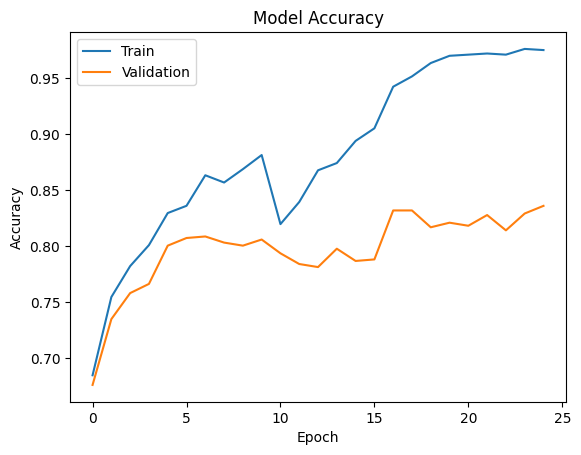

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

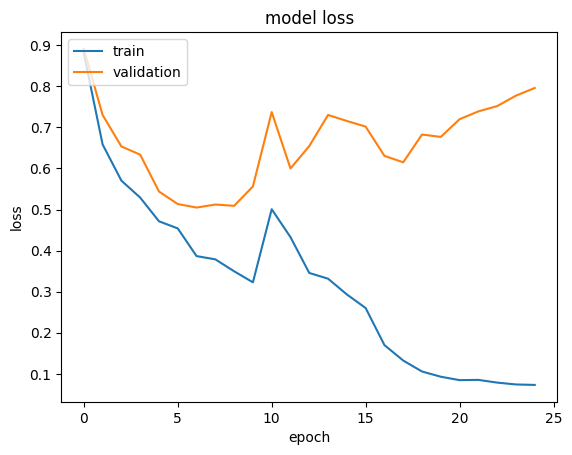

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

categories = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

Saving 4b618537d52f.png to 4b618537d52f.png
1/1 [==============================] - 0s 170ms/step


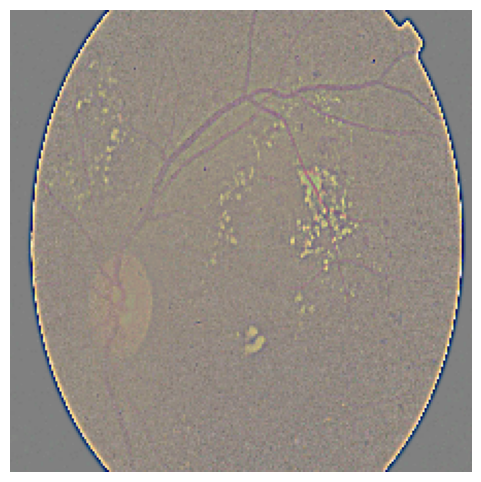

Predicted case -> Severe


In [40]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

# Rest of your code...

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():


  # predicting images
  image_path =fn
  image = tf.keras.preprocessing.image.load_img(image_path)
  image = image.resize((224,224))
  image_array = tf.keras.preprocessing.image.img_to_array(image)
  image_array = image_array / 255.0
  scaled_img = np.expand_dims(image_array, axis=0)
  plt.figure(figsize=(6, 6))
  plt.imshow(image)
  plt.axis("off")

# Use model to predict the sample image
pred = model.predict(scaled_img)

# show the output of predicted image
output = categories[np.argmax(pred)]
plt.show()
print("Predicted case ->", output)


In [ ]:
model.save_weights('./checkpoints/my_checkpoint')